In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
import prob_new as p
from aps_annealing import *
from mcmc import *
from joblib import Parallel, delayed
import multiprocessing
import sys
import pickle
import argparse
from timeit import default_timer
from importlib import import_module
from contextlib import contextmanager
from plotnine import *
from timeit import repeat

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-216-f7d775c8f70b>", line 5, in <module>
    current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
  File "/usr/lib/python3.6/posixpath.py", line 374, in abspath
    cwd = os.getcwd()
FileNotFoundError: [Errno 2] No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", 

FileNotFoundError: [Errno 2] No such file or directory

# Compute minimum required number of iteratios to converge

In [3]:
d_opt, d_d = aps_adg_ann(1000, 1000, d_util, a_util, prob, N_aps=10, burnin=0.1, N_inner=10, prec=0.01, mean=True, 
                     info=True)

In [4]:
d_opt

0.5098848502467794

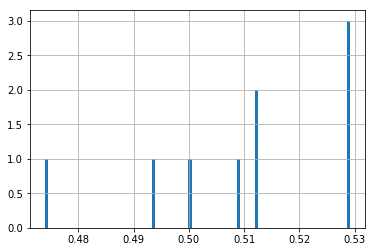

In [5]:
d_d.hist(bins = int(1.0/0.01))
plt.show()

In [31]:
start = default_timer()
##
d_opt = aps_adg_ann(100000, 1000, d_util, a_util, prob, N_aps=1000, burnin=0.1, N_inner=100, prec=0.01, mean=True, 
                     info=False)
##
end = default_timer()
end - start

64.36520635895431

In [210]:
n_jobs = -1
times = 10
disc = 0.01
d_true = 0.46

def find_d_opt():
    temp_outer = 10000
    temp_inner = 100
    iter_outer = 500
    iter_inner = 100
    d_opt = aps_adg_ann(temp_outer, temp_inner, p.d_util, p.a_util,
                        p.prob, N_aps=iter_outer, N_inner=iter_inner,
                        burnin=0.2, prec=disc, mean=True, info=False)
    
    return d_opt

optimal_d = Parallel(n_jobs=n_jobs)(
    delayed(find_d_opt)() for j in range(times)
)

optimal_d_round = np.round(optimal_d, int(-np.log10(disc)))
percent = np.mean(np.isclose(np.array(optimal_d_round), d_true, rtol=disc))

# percent = np.mean(
#    np.isclose(np.array(optimal_d), d_true, rtol=disc)
#)
## Are 90% equal to the truth? Then we converge.
#if percent >= 0.9:
#    break

In [211]:
optimal_d

[0.4642400933920078,
 0.4746966670822211,
 0.46790387093153646,
 0.4556350322507845,
 0.4664693086438685,
 0.46682460109423773,
 0.4720025056896715,
 0.4540560245650555,
 0.4628747185261052,
 0.4661981727420816]

In [212]:
d_true = 0.46
optimal_d_round = np.round(optimal_d, int(-np.log10(disc)))
percent = np.mean(np.isclose(np.array(optimal_d_round), d_true, rtol=disc))
percent

0.3

In [209]:
start = default_timer()
##
d_opt = aps_adg_ann(10000, 100, d_util, a_util, prob, N_aps=500, burnin=0.2, N_inner=100, prec=0.01, mean=True, 
                     info=False)
##
end = default_timer()
end - start

3.5630015520146117

In [124]:
n = 50
r = 3
temp_outer = 100000
temp_inner = 100
iter_outer = 1000
iter_inner = 100
step = 0.01
fstr = f'''aps_adg_ann({temp_outer}, {temp_inner}, d_util, a_util,
                               prob, N_aps={iter_outer}, burnin=0.1,
                               N_inner={iter_inner}, prec={step}, mean=True,
                               info=False)'''

repeat(fstr, number=n, repeat=r, globals=globals())

KeyboardInterrupt: 